<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Credit_Risk_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
#1.Data Load
data1=("/content/drive/My Drive/Colab Notebooks/Credit Risk/cs-training.csv")

In [5]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv(data1)
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [19]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [20]:
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [29]:
#Cleaning data
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [30]:
df.dropna(inplace=True)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,120269.0,0.069486,0.254280,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,120269.0,5.899873,257.040685,0.0,0.035084,0.177282,0.579428,50708.0
age,120269.0,51.289792,14.426684,0.0,40.000000,51.000000,61.000000,103.0
NumberOfTime30-59DaysPastDueNotWorse,120269.0,0.381769,3.499234,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,120269.0,26.598777,424.446457,0.0,0.143388,0.296023,0.482559,61106.5
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,120269.0,8.758475,5.172835,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,120269.0,0.211925,3.465276,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,120269.0,1.054519,1.149273,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,120269.0,0.187829,3.447901,0.0,0.000000,0.000000,0.000000,98.0


In [31]:
#Membuat Variabel
X=df.drop(['SeriousDlqin2yrs'],axis=1)
Y=df['SeriousDlqin2yrs']

In [32]:
#Membuat Train Test Split Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [46]:
#Membuat Model
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(max_iter=10000)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# Saving the model
import pickle
pickle.dump(logreg, open('logreg.pkl', 'wb'))

In [51]:
#Lakukan prediksi dan hitung akurasi
Y_pred=logreg.predict(X_test)
print('Akurasi skor model berikut yaitu : {:.2f}'.format(logreg.score(X_test,Y_test)*100),'%')

Akurasi skor model berikut yaitu : 93.02 %


In [48]:
#Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
ConfusionMatrix=confusion_matrix(Y_test, Y_pred)
print(ConfusionMatrix)

[[22295    57]
 [ 1622    80]]


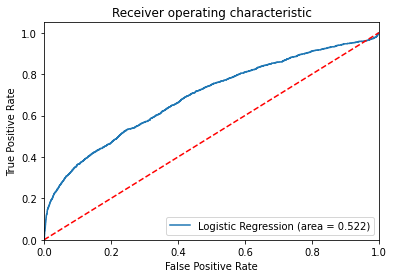

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()